# Sentiment Analysis

**Order of word** matters in sentiment analysis. Therefore, we will be using **corpus** (NOT document-term matrix). Negation of words such as "not smart" will affect the sentiment scores, hence order of word is important.  

We will use two approaches for sentiment analysis : 
1. Rule-based approach 
2. Machine learning appraoch 

### Further explanation of approaches 
**1. Rule-based approach** (covered in this notebook)  
    A practical approach to analyse text without training machine learning models. The result of this approach is the Polarity and Subjectivity score of each text based on a pre-defined and manually created set of rules. The rules are known as lexicons, hence this approach is also called Lexicon-based approach. We use the **`TextBlob`** and **`Vader`** modules for this approach. 
    
**2. Machine learning approach** (covered in 4.5-Sentiment-Analysis-Classification)  
    An algorithm that learns from training data. We can train a classification model with the text as features and `?` as our target variables. We will explore two text classification models, namely **Logistic Regression** and **Naive Bayes**. 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt 
import pickle
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 

In [60]:
# load corpus 
df = pd.read_pickle('/Users/lihuicham/Desktop/Y2S2/BT4222/project/standup-comedy-analysis/main/pickle/corpus.pkl')
df.head()

,Comedian,Date,Title,Subtitle,Transcript
0,Chris Rock,"March 8, 2023",Selective Outrage (2023) | Transcript,NaN,lets go she said ill do anything you w...
1,Marc Maron,"March 3, 2023",Thinky Pain (2013) | Transcript,Marc Maron returns to his old stomping grounds...,i dont know what you were thinking like im no...
2,Chelsea Handler,"March 3, 2023",Evolution (2020) | Transcript,Chelsea Handler is back and better than ever -...,join me in welcoming the author of six number ...
3,Tom Papa,"March 3, 2023",What A Day! (2022) | Transcript,"Follows Papa as he shares about parenting, his...",premiered on december ladies and gentlemen g...
4,Jim Jefferies,"February 22, 2023",High n’ Dry (2023) | Transcript,Jim Jefferies is back and no topic is off limi...,please welcome to the stage jim jefferies hell...


## Rule-based Approach 

We use the `TextBlob` and `Vader` modules for rule-based approach. Linguists have labelled the sentiment of words and the sentiment can vary based on its order and position in the sentence. Each corpus (in our case, each transcript) is labelled in terms of **polarity** and **subjectivity**. A corpus's sentiment is the *average* of these. 

`Vader` is used widely in analysing social media texts as it takes into account repeated words, punctuations (such as exclamation mark), capitalisation of words and even emojis. 

### Metrics in the modules 

**TextBlob :** 

* **Polarity :** How positive or negative a word is, with a range of [-1.0, +1.0].  
    -1.0 is very negative; +1.0 is very positive. 
* **Subjectivity :** How subjective or opinionated a word is, with a range of [0.0, 1.0].   
    0.0 is very objective (facts); 1.0 is very subjective (opinions). 
    
**Vader :** 
* positive sentiment: compound score >= 0.05
* neutral sentiment: (compound score > -0.05) and (compound score < 0.05)
* negative sentiment: compound score <= -0.05

### TextBlob 

In [32]:
# lambda functions for TextBlob to find polarity and subjectivity of each transcript 
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

In [ ]:
df_textblob = df.copy()

In [33]:
# get the polarity and subjectivity score of each transcript 
df_textblob['Polarity_Score'] = df_textblob['Transcript'].apply(pol)
df_textblob['Subjectivity_Score'] = df_textblob['Transcript'].apply(sub)

In [34]:
# assign binary class for polarity based on polarity score
df_textblob['Polarity_Class'] = 0
df_textblob.loc[df_textblob.Polarity_Score >= 0,'Polarity_Class']= 1
df_textblob.loc[df_textblob.Polarity_Score < 0,'Polarity_Class']= 0

# assign binary class for polarity based on polarity score
df_textblob['Subjectivity_Class'] = 0
df_textblob.loc[df_textblob.Subjectivity_Score >= 0.5,'Subjectivity_Class']= 1
df_textblob.loc[df_textblob.Subjectivity_Score < 0.5,'Subjectivity_Class']= 0

In [35]:
df_textblob.to_csv('sentiments_textblob.csv')

In [36]:
df_textblob.head()

,Comedian,Date,Title,Subtitle,Transcript,Polarity_Score,Subjectivity_Score,Polarity_Class,Subjectivity_Class
0,Chris Rock,"March 8, 2023",Selective Outrage (2023) | Transcript,NaN,lets go she said ill do anything you w...,0.053924,0.537392,1,1
1,Marc Maron,"March 3, 2023",Thinky Pain (2013) | Transcript,Marc Maron returns to his old stomping grounds...,i dont know what you were thinking like im no...,0.039222,0.527340,1,1
2,Chelsea Handler,"March 3, 2023",Evolution (2020) | Transcript,Chelsea Handler is back and better than ever -...,join me in welcoming the author of six number ...,0.028674,0.496281,1,0
3,Tom Papa,"March 3, 2023",What A Day! (2022) | Transcript,"Follows Papa as he shares about parenting, his...",premiered on december ladies and gentlemen g...,0.040564,0.541739,1,1
4,Jim Jefferies,"February 22, 2023",High n’ Dry (2023) | Transcript,Jim Jefferies is back and no topic is off limi...,please welcome to the stage jim jefferies hell...,0.059485,0.540981,1,1


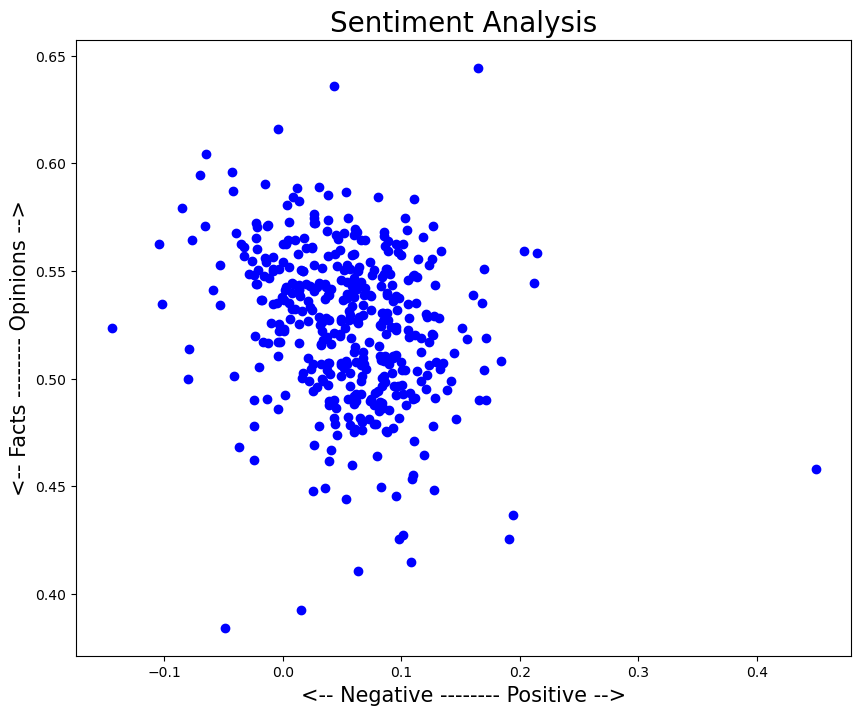

In [37]:
# plotting the results 

plt.rcParams['figure.figsize'] = [10, 8]

for index, transcript in enumerate(df_textblob.index):
    x = df_textblob.Polarity_Score.loc[transcript]
    y = df_textblob.Subjectivity_Score.loc[transcript]
    plt.scatter(x, y, color='blue')
#     plt.text(x+.001, y+.001, df['Comedian'][index], fontsize=10)
#     plt.xlim(-.10, .12) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

<AxesSubplot:title={'center':'Polarity with TextBlob'}>

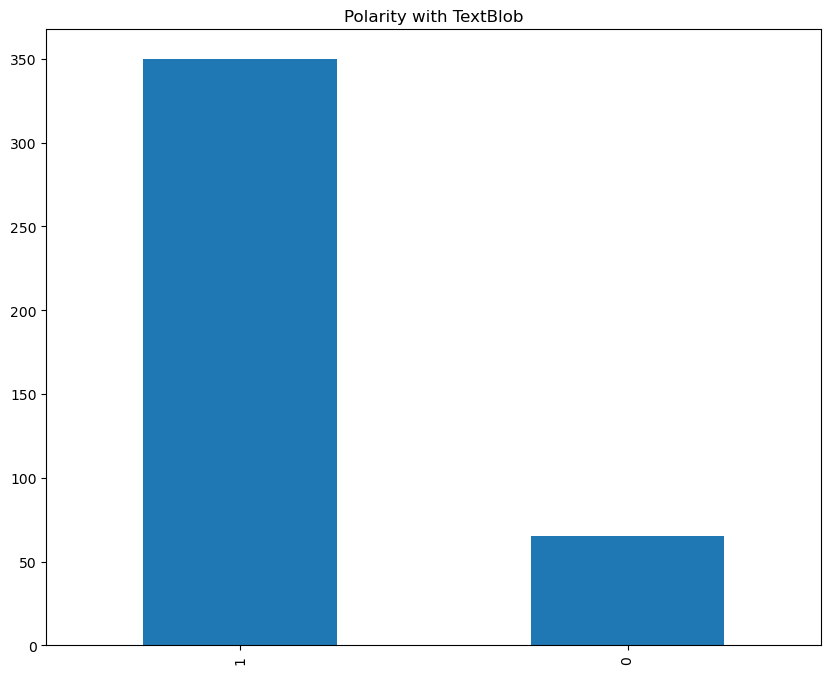

In [39]:
df_textblob.Polarity_Class.value_counts().plot(kind='bar',title="Polarity with TextBlob")

<AxesSubplot:title={'center':'Subjectivity with TextBlob'}>

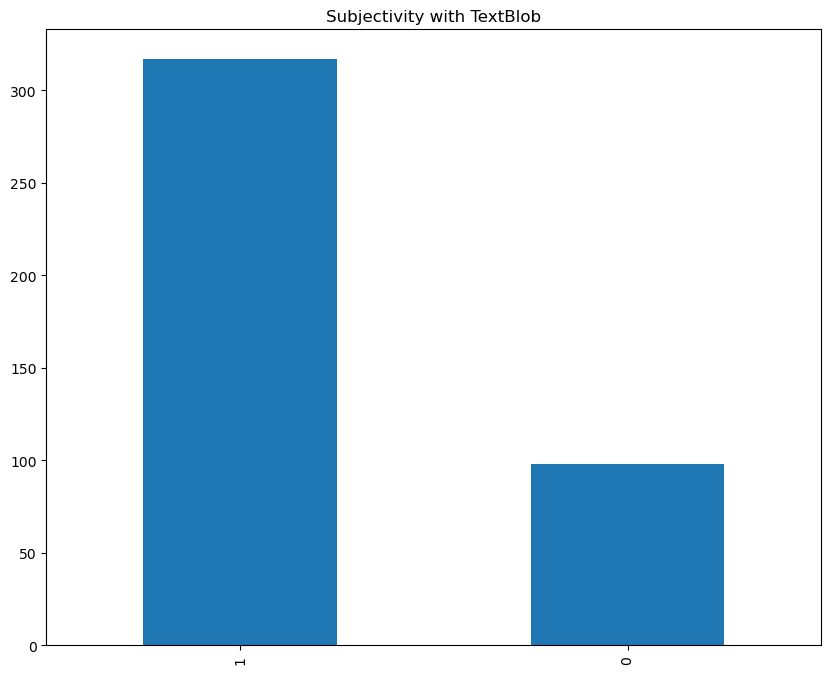

In [40]:
df_textblob.Subjectivity_Class.value_counts().plot(kind='bar',title="Subjectivity with TextBlob")

### Vader

In [43]:
# create a lambda function for Vader
pol_vader = lambda x: SentimentIntensityAnalyzer().polarity_scores(x)

In [ ]:
df_vader = df.copy()

In [63]:
# this code takes some time to run 
df_vader['Polarity_Score'] = df_vader['Transcript'].apply(pol_vader)

In [66]:
df_vader['Compound_Score'] = df_vader['Polarity_Score'].apply(lambda score_dict: score_dict['compound'])

In [76]:
df_vader.loc[df_vader.Compound_Score >= 0.5,'Polarity_Class']= 1                                         # positive 
df_vader.loc[(df_vader.Compound_Score > -0.05) & (df_vader.Compound_Score < 0.05),'Polarity_Class']= 0   # neutral 
df_vader.loc[df_vader.Compound_Score <= -0.05,'Polarity_Class']= -1                                      # negative

<AxesSubplot:title={'center':'Polarity with Vader'}>

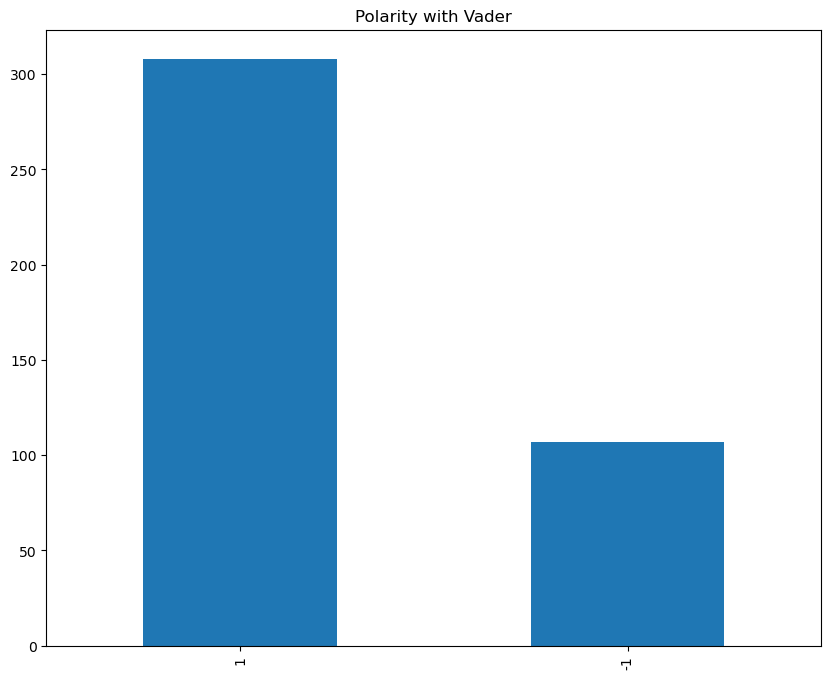

In [71]:
df_vader.Polarity_Class.value_counts().plot(kind='bar',title="Polarity with Vader")

Since there is no `neutral` class, let's remove it and change the threshold value to determine the binary classification of Polarity for Vader. 

In [78]:
df_vader.loc[df_vader.Compound_Score >= 0,'Polarity_Class']= 1                                         
df_vader.loc[df_vader.Compound_Score < 0,'Polarity_Class']= 0                                 

In [79]:
df_vader.to_csv('sentiments_vader.csv')

In [75]:
df_vader.head()

,Comedian,Date,Title,Subtitle,Transcript,Polarity_Score,Compound_Score,Polarity_Class
0,Chris Rock,"March 8, 2023",Selective Outrage (2023) | Transcript,NaN,lets go she said ill do anything you w...,"{'neg': 0.158, 'neu': 0.682, 'pos': 0.16, 'com...",-0.9986,0
1,Marc Maron,"March 3, 2023",Thinky Pain (2013) | Transcript,Marc Maron returns to his old stomping grounds...,i dont know what you were thinking like im no...,"{'neg': 0.094, 'neu': 0.76, 'pos': 0.146, 'com...",1.0000,1
2,Chelsea Handler,"March 3, 2023",Evolution (2020) | Transcript,Chelsea Handler is back and better than ever -...,join me in welcoming the author of six number ...,"{'neg': 0.095, 'neu': 0.749, 'pos': 0.156, 'co...",1.0000,1
3,Tom Papa,"March 3, 2023",What A Day! (2022) | Transcript,"Follows Papa as he shares about parenting, his...",premiered on december ladies and gentlemen g...,"{'neg': 0.121, 'neu': 0.75, 'pos': 0.128, 'com...",0.9965,1
4,Jim Jefferies,"February 22, 2023",High n’ Dry (2023) | Transcript,Jim Jefferies is back and no topic is off limi...,please welcome to the stage jim jefferies hell...,"{'neg': 0.108, 'neu': 0.756, 'pos': 0.136, 'co...",0.9997,1


<AxesSubplot:title={'center':'Polarity with Vader'}>

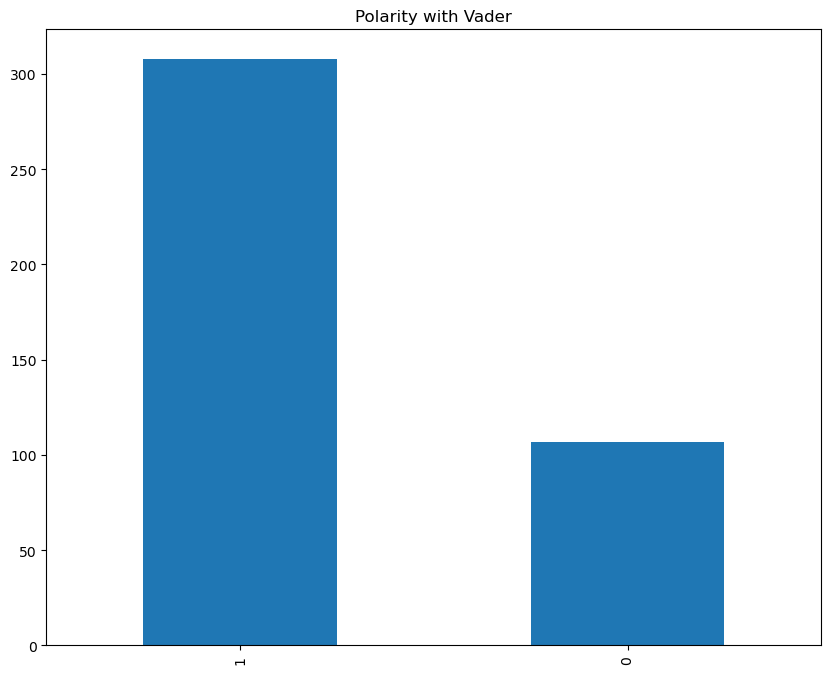

In [80]:
df_vader.Polarity_Class.value_counts().plot(kind='bar',title="Polarity with Vader")

In [81]:
# pickle files 
import pickle 

with open('pickle/' + 'sentiments_textblob.pkl', 'wb') as f:
    pickle.dump(df_textblob, f)

with open('pickle/' + 'sentiments_vader.pkl', 'wb') as f:
    pickle.dump(df_vader, f)

## TextBlob vs Vader 
Vader classifies more negative class than TextBlob. 

In [4]:
# load pickle for textblob dataframe 
df_textblob = pd.read_pickle('/Users/lihuicham/Desktop/Y2S2/BT4222/project/standup-comedy-analysis/main/pickle/sentiments_textblob.pkl')
print(df_textblob['Polarity_Class'].value_counts())

1    350
0     65
Name: Polarity_Class, dtype: int64


In [5]:
# load pickle for vader dataframe 
df_vader = pd.read_pickle('/Users/lihuicham/Desktop/Y2S2/BT4222/project/standup-comedy-analysis/main/pickle/sentiments_vader.pkl')
print(df_vader['Polarity_Class'].value_counts())

1    308
0    107
Name: Polarity_Class, dtype: int64
